In [9]:
!pip install wget
import os
import torch
import pandas as pd
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import pickle


ssh_config = """
Host github.com
  IdentityFile ~/.ssh/github.pem
  User davipeag
  StrictHostKeyChecking no
"""

if os.name == 'nt':
  base_path = ""
  REPO_DIR = "."
  STORE_DIR ="." 
  print("Windows")
else:
  print("Unix-like")
  REPO_DIR = "/tmp/HeartRateRegression"
  from google.colab import drive
  drive.mount('/content/drive')
  GIT_PATH = "/content/drive/My\ Drive/deeplearning_project/github.pem"
  DATA_DIR = os.path.join(REPO_DIR, "repo")
  STORE_DIR ="/content/drive/My Drive/deeplearning_project/" 
  !mkdir ~/.ssh
  !cp -u {GIT_PATH} ~/.ssh/
  !chmod u=rw,g=,o= ~/.ssh/github.pem
  !echo "{ssh_config}" > ~/.ssh/config
  !chmod u=rw,g=,o= ~/.ssh/config
  ! (cd /tmp && git clone git@github.com:davipeag/HeartRateRegression.git)
  ! (cd {REPO_DIR} && git pull )
  import sys
  sys.path.append(REPO_DIR)

def git_pull():
  ! (cd {REPO_DIR} && git pull )

git_pull()

Unix-like
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/root/.ssh’: File exists
fatal: destination path 'HeartRateRegression' already exists and is not an empty directory.
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 9 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.
From github.com:davipeag/HeartRateRegression
   1485ead..a31eac5  master     -> origin/master
Updating 1485ead..a31eac5
Fast-forward
 dalia_deepconvlstm.ipynb |  749 ++++++++++++++++++++++++++---
 pamap_deepconvlstm.ipynb | 1184 ++++++++++++++++++++++++++++++++++++++++++++--
 ppg_pce_lstm.ipynb       |  227 +++++----
 3 files changed, 1934 insertions(+), 226 deletions(-)
Already up to date.


In [3]:
import random
import torch
from torch import nn
import numpy as np
args = {
    'epoch_num': 250,     # Number of epochs.
    'lr': 1.0e-3,           # Learning rate.
    'weight_decay': 10e-4, # L2 penalty.
    'momentum': 0.9,      # Momentum.
    'num_workers': 0,     # Number of workers on data loader.
    'batch_size': 128,     # Mini-batch size. 128
    'batch_test': 248,     # size of test batch
    'window': 15,
    'initial_window':5,
    'clip_norm': 6.0,     # Upper limit on gradient L2 norm ###
}
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])

SEED = 1234
def reset_seeds():
  random.seed(SEED)
  np.random.seed(SEED)
  torch.manual_seed(SEED)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False
  torch.cuda.manual_seed(SEED)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

reset_seeds()

cuda


In [4]:
from data_utils import (PpgDaliaExtractor, FormatPPGDalia)

extractor = PpgDaliaExtractor(DATA_DIR)
ppg_dalia_formatter = FormatPPGDalia()
dfs_train = [ppg_dalia_formatter.transform(extractor.extract_subject(i)) for i in range(1,16)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """


In [10]:
git_pull()

import importlib

import PPG

from PPG import FullTrainer

importlib.reload(PPG.AttentionDefaults)
importlib.reload(PPG)
importlib.reload(PPG.UtilitiesDataXY)
importlib.reload(PPG.Models)
importlib.reload(PPG.NoHrPceLstmModel)
importlib.reload(PPG.TrainerXY)
importlib.reload(PPG.TrainerIS)
importlib.reload(PPG.FullTrainer)

git_pull()

import importlib

import PPG
import preprocessing_utils
from PPG import FullTrainer
import RegressionHR

from RegressionHR import FullTrainer
from RegressionHR import PceLstmDefaults
from RegressionHR import PceLstmModel
from RegressionHR import TrainerJoint
from RegressionHR import  UtilitiesData
import Models
from  Models.BaseModels import ConstantHiddenSizeHalvingFullyConvolutionalEncoder1D
from Models import TimeSnippetModels

import PreprocessingHelpers

import Constants
from Constants import DatasetMapping


import Trainer
from  Trainer import BatchTrainers
from Trainer import BatchComputers
from Trainer import Interfaces

import CustomTrainers
from CustomTrainers import  DeepConvLstmFullTrainer
from CustomTrainers import SpecificTrainers, FullTrainers

import PPG

from PreprocessingHelpers import TransformerGetters

importlib.reload(PreprocessingHelpers)
importlib.reload(PreprocessingHelpers.TransformerGetters)
importlib.reload(PreprocessingHelpers)

importlib.reload(PPG)
importlib.reload(PPG.NoHrPceLstmModel)
importlib.reload(PPG.TrainerXY)
importlib.reload(PPG.TrainerIS)
importlib.reload(PPG.FullTrainer)
importlib.reload(PceLstmDefaults)



importlib.reload(CustomTrainers)
importlib.reload(CustomTrainers.FullTrainers)
importlib.reload(CustomTrainers.SpecificTrainers)

import PreprocessingHelpers.TransformerGetters
                            


importlib.reload(Constants.DatasetMapping)


# importlib.reload(PPG.AttentionDefaults)

# importlib.reload(PPG.UtilitiesDataXY)
importlib.reload(PPG.Models)
importlib.reload(Models.BaseModels)
importlib.reload(Models.TimeSnippetModels)
importlib.reload(preprocessing_utils)
importlib.reload(RegressionHR)
importlib.reload(RegressionHR.FullTrainer)
importlib.reload(RegressionHR.PceLstmDefaults)
importlib.reload(PPG.UtilitiesDataXY)
importlib.reload(preprocessing_utils)
importlib.reload(RegressionHR.TrainerJoint)
importlib.reload(RegressionHR.UtilitiesData)
importlib.reload(RegressionHR.PceLstmModel)
importlib.reload(preprocessing_utils)

importlib.reload(Trainer)
importlib.reload(Trainer.BatchTrainers)
importlib.reload(Trainer.BatchComputers)
importlib.reload(Trainer.ToolBox)
importlib.reload(Trainer.Interfaces )
# import imp
# for module in sys.modules.values():
#     importlib.reload(module)


Already up to date.
Already up to date.


<module 'Trainer.Interfaces' from '/tmp/HeartRateRegression/Trainer/Interfaces.py'>

In [5]:
def compute_ensemble_named(results, model_name="PceLstm"):
  
  # results = [r[model_name] for r in results]

  ys = [v["labels"].reshape(-1) for v in results]
  min_len_y = min([len(y) for y in ys])
  ys = [y[:min_len_y] for y in ys]
  for i in range(1, len(ys)-1):
    # assert np.all(ys[i] == ys[i-1])
    assert np.all(np.abs(ys[i] - ys[i-1])<1)
  ps = np.stack([v["predictions"].reshape(-1)[:min_len_y] for v in results])

  s = ps[0]
  for p in ps[1:]:
    s = s + p

  a = s/len(ps)
  y = ys[0]

  plt.figure()
  plt.plot(a)
  plt.plot(y)
  plt.show()

  return np.mean(np.abs(a - y)), np.mean(np.abs(ps - y))

fchoice = {
    'is_h_size': 64,
    'ts_per_is': 12,
    'period_s': 8,
    'step_s': 2,
    'ts_per_window': 50,
    'ts_sub': 0,
    'batch_size': 64,
    'weight_decay': 1e-05,
    'lr': 0.005,
    'nattrs': 7,
    'dropout_rate':0.15,
    'lstm_input': 128,
    'lstm_size': 64,
    'ts_h_size': 16
}
import CustomTrainers
from CustomTrainers import SingleNoHrPpgPceLstmFullTrainerSeparateBVP

from PPG import UtilitiesDataXY
from collections import defaultdict

model_name = "NoHrPpgPceLstm"
nepoch = 50
aresults = defaultdict(dict)
for val_sub in range(7):
  for ts_sub in range(15):
    fchoice['ts_sub'] = ts_sub
    full_trainer = SingleNoHrPpgPceLstmFullTrainerSeparateBVP(dfs_train, args["device"], nepoch, "dalia","NoHrPpgPceLstm")
    filename = f"dalia_ts_{ts_sub}_{val_sub}_from_ecg_period2_new_parameters_nepoch_{nepoch}_separate_bvp.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      out = full_trainer.train(**fchoice)
      with open(save_path, "wb") as f:
        pickle.dump(out, f)    
    print(out["args"], out['metric'])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble_named(list(aresults[ts_sub].values()))}")

{'frequency_hz': 32, 'net_args': {'is_h_size': 64, 'nattrs': 5, 'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'ts_per_is': 12, 'sample_per_ts': 256}, 'step_s': 2, 'period_s': 8, 'ts_per_is': 12, 'ts_per_window': 50, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005, 'sample_per_ts': 256, 'is_h_size': 64, 'nattrs': 5, 'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16} 6.25635


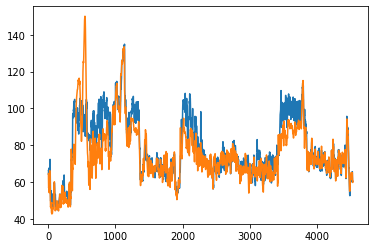

0-TS:(6.25635, 6.25635)
best val epoch: 1
[1/50]: loss_train: [16.485449] loss_val [15.322237] loss_ts [10.359429]
best val epoch: 2
[2/50]: loss_train: [13.595316] loss_val [11.953993] loss_ts [7.6411757]
best val epoch: 3
[3/50]: loss_train: [12.848765] loss_val [11.543063] loss_ts [6.4239426]
best val epoch: 5
[5/50]: loss_train: [9.04269] loss_val [8.250457] loss_ts [5.459274]
best val epoch: 7
[7/50]: loss_train: [7.69371] loss_val [7.0631127] loss_ts [4.7312975]
best val epoch: 8
[8/50]: loss_train: [6.6419024] loss_val [6.549048] loss_ts [4.3260517]
best val epoch: 9
[9/50]: loss_train: [6.1675067] loss_val [6.086276] loss_ts [4.475572]
best val epoch: 13


In [ ]:
def compute_ensemble_named(results, model_name="PceLstm"):
  
  # results = [r[model_name] for r in results]

  ys = [v["labels"].reshape(-1) for v in results]
  min_len_y = min([len(y) for y in ys])
  ys = [y[:min_len_y] for y in ys]
  for i in range(1, len(ys)-1):
    # assert np.all(ys[i] == ys[i-1])
    assert np.all(np.abs(ys[i] - ys[i-1])<1)
  ps = np.stack([v["predictions"].reshape(-1)[:min_len_y] for v in results])

  s = ps[0]
  for p in ps[1:]:
    s = s + p

  a = s/len(ps)
  y = ys[0]

  plt.figure()
  plt.plot(a)
  plt.plot(y)
  plt.show()

  return np.mean(np.abs(a - y)), np.mean(np.abs(ps - y))

fchoice = {
    'is_h_size': 64,
    'ts_per_is': 12,
    'period_s': 8,
    'step_s': 2,
    'ts_per_window': 50,
    'ts_sub': 0,
    'batch_size': 64,
    'weight_decay': 1e-05,
    'lr': 0.005,
    'nattrs': 7,
    'dropout_rate':0.15,
    'lstm_input': 128,
    'lstm_size': 64,
    'ts_h_size': 16
}
import CustomTrainers
from CustomTrainers import SingleNoHrPpgPceLstmFullTrainer

from PPG import UtilitiesDataXY
from collections import defaultdict

model_name = "NoHrPpgPceLstm"
nepoch = 50
aresults = defaultdict(dict)
for val_sub in range(7):
  for ts_sub in range(15):
    fchoice['ts_sub'] = ts_sub
    full_trainer = SingleNoHrPpgPceLstmFullTrainer(dfs_train, args["device"], nepoch, "dalia","NoHrPpgPceLstm")
    filename = f"dalia_ts_{ts_sub}_{val_sub}_from_ecg_period2_new_parameters_nepoch_{nepoch}_.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      out = full_trainer.train(**fchoice)
      with open(save_path, "wb") as f:
        pickle.dump(out, f)    
    print(out["args"], out['metric'])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble_named(list(aresults[ts_sub].values()))}")

In [ ]:
import matplotlib.pyplot as plt
import pickle
# fchoice = {'val_sub': 4,
#   'ts_sub': 0,
#   'batch_size': 64,
#   'weight_decay': 0,
#   'lr': 0.001,
#   'nattrs': 5,
#   'bvp_count': 16,
#   'dropout_rate': 0.25,
#   'lstm_input': 128,
#   'lstm_size': 64,
#   'ts_h_size': 64
#   }
def compute_ensemble(results):
  ps = np.stack([v["predictions"][1].reshape(-1).numpy() for v in results])
  ys = [v["predictions"][0].reshape(-1).numpy() for v in results]

  for i in range(1, len(ys)-1):
    assert np.all(ys[i] == ys[i-1])

  s = ps[0]
  for p in ps[1:]:
    s = s + p

  a = s/len(ps)
  y = ys[0]

  plt.plot(a)
  plt.plot(y)

  return np.mean(np.abs(a - y)), np.mean(np.abs(ps - y))


fchoice = {'val_sub': 4,
  'ts_sub': 0,
  'batch_size': 64,
  'weight_decay': 0.0001,
  'lr': 0.001,
  'nattrs': 5,
  'bvp_count': 12,
  'dropout_rate': 0,
  'lstm_input': 128,
  'lstm_size': 32,
  'ts_h_size': 32
  }


from PPG import UtilitiesDataXY
from collections import defaultdict

aresults = defaultdict(list)
for i in range(7):
  for ts_sub in [0,1,2,3, 4,5,6,7,8,9,10,11,12,13,14]:
    filename = f"dalia_ts_{ts_sub}_{i}_from_ecg_period2_.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      full_trainer = FullTrainer.JointValNoHrPceLstmFullTrainer(dfs_train, args["device"])
      try:
        fchoice["ts_sub"] = ts_sub
        out = full_trainer.train(**fchoice)
        
        with open(save_path, "wb") as f:
          pickle.dump(out, f)

      except RuntimeError as e:
        if isinstance(e, KeyboardInterrupt):
          raise e
        else:
          print("####")
          print(f"Failed: {choice}")
          print("###")
    
    print(out["args"], out["metric"])
    aresults[ts_sub].append(out)
    print(f"{ts_sub}-TS:{compute_ensemble(aresults[ts_sub])}")
    



In [ ]:

def compute_ensemble(results):
  ps = [v["predictions"][1].reshape(-1).numpy() for v in results]
  ys = [v["predictions"][0].reshape(-1).numpy() for v in results]

  for i in range(1, len(ys)-1):
    assert np.all(ys[i] == ys[i-1])

  s = ps[0]
  for p in ps[1:]:
    s = s + p

  a = s/len(ps)
  y = ys[0]

  plt.plot(a)
  plt.plot(y)

  np.mean(np.abs(a - y))

compute_ensemble(dresults)

# import matplotlib.pyplot as plt


# p = p.reshape(-1)

# plt.plot(y)
# plt.plot(p)


In [ ]:
import random 
options = {
  "ts_h_size": [64, 128],
  "lstm_size": [64, 64, 128],
  "lstm_input": [64, 128, 256],
  "dropout_rate": [0.25],
  "bvp_count": [8,16],
  "nattrs": [5],
  'lr': [0.001],
  'weight_decay': [0, 0.0001],
  'batch_size': [64, 128, 256],
  'ts_sub': [0],
  'val_sub': [4]
 }

def choose(options):
  choice = dict()
  for k,v in options.items():
    choice[k] = random.choice(v)
  return choice


In [ ]:
results = list()
from PPG import UtilitiesDataXY
while True:
  full_trainer = FullTrainer.NoHrPceLstmFullTrainer(dfs_train, args["device"])
  choice = choose(options)
  try:
    out = full_trainer.train(**choice)
    print(out["args"], out["metric"])
    results.append([out["args"], out["metric"]])
  except RuntimeError as e:
    if isinstance(e, KeyboardInterrupt):
      raise e
    else:
      print("####")
      print(f"Failed: {choice}")
      print("###")

In [ ]:
results

In [ ]:
fchoice = {'val_sub': 4,
  'ts_sub': 0,
  'batch_size': 64,
  'weight_decay': 0,
  'lr': 0.001,
  'nattrs': 5,
  'bvp_count': 16,
  'dropout_rate': 0.25,
  'lstm_input': 128,
  'lstm_size': 64,
  'ts_h_size': 64}


dresults = list()
from PPG import UtilitiesDataXY
ts_sub = 3
for val_sub in [i for i in range(15) if i != ts_sub]:
  full_trainer = FullTrainer.NoHrPceLstmFullTrainer(dfs_train, args["device"])
  try:
    fchoice["ts_sub"] = ts_sub
    fchoice["val_sub"] = val_sub
    out = full_trainer.train(**fchoice)
    print(out["args"], out["metric"])
    dresults.append([out])
  except RuntimeError as e:
    if isinstance(e, KeyboardInterrupt):
      raise e
    else:
      print("####")
      print(f"Failed: {choice}")
      print("###")

In [ ]:
y = 

In [ ]:
full_trainer = FullTrainer.AttentionFullTrainer(dfs_train, args["device"], 0, 1)

full_trainer.train()

In [ ]:
from PPG import UtilitiesDataXY 


transformers = PPG.AttentionDefaults.get_preprocessing_transformer()
make_loaders = UtilitiesDataXY.DataLoaderFactory(transformers, dfs_train).make_loaders

loader_tr, loader_val, loader_ts = make_loaders(ts_sub=0, val_sub=1)

In [ ]:
from PPG.Models import SnippetConvolutionalTransformer

net = SnippetConvolutionalTransformer().to(args["device"])

# x,y = next(iter(loader_tr))

# p = net(x)

criterion = nn.MSELoss().to(args["device"])# nn.L1Loss().to(args["device"]) #nn.CrossEntropyLoss().to(args["device"])
optimizer = torch.optim.Adam(net.parameters(), lr=args["lr"],
                             weight_decay=args["weight_decay"])


In [ ]:
from PPG.TrainerXY import (EpochTrainerXY, MetricsComputerXY, TrainHelperXY)
from preprocessing_utils import ZTransformer2

epoch_trainer = EpochTrainerXY(net, optimizer, criterion, args["device"])
ztransformer = ZTransformer2(['heart_rate', 'wrist-ACC-0', 'wrist-ACC-1', 'wrist-ACC-2',
              'wrist-BVP-0', 'wrist-EDA-0', 'wrist-TEMP-0', 'chest-ACC-0',
              'chest-ACC-1', 'chest-ACC-2', 'chest-Resp-0'])
metrics_comuter = MetricsComputerXY(ztransformer)

train_helper = TrainHelperXY(epoch_trainer, loader_tr, loader_val, loader_ts, metrics_comuter.mae)

In [ ]:
train_helper.train(30)